# Programming Seminar. Rosenbrock test function

#### 2-dimensional Rosenbrock function
$$f(x) = 100 (x_2 - x_1^2)^2 + (1 - x_1)^2 $$

Minimum at $[1, 1].$

Starting points for algorithms:
$$x^a = [0, 0]^T$$
$$x^b = [-1, -1]^T$$
$$x^c = [-0.9, -0.8]^T$$
$$x^d = [-0.9, 1.1]^T$$

#### Multi-dimensional bad function (by Nesterov)
$$f(x) = \frac{1}{4} (1 - x_1)^2 + \sum_{i=2}^{n} (x_{i} - 2x_{i-1}^2 + 1)^2, \;\; x \in \mathbb{R}^n$$

Take $n = 3,\ldots,6$.

$$x^a = [0, 0, \ldots, 0]^T$$
$$x^b = [-1, 1, \ldots, 1]^T$$
$$x^c = [-1, 0.9, \ldots, 0.9]^T$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 2D Rosenbrock function
def rosen2d(x):
    return rosen2d_XY(x[0], x[1])
# same, but accepts arrays (useful for plotting)
def rosen2d_XY(X, Y):
    return 100*(Y - X**2)**2 + (1 - X)**2

# Gradient of 2D Rosenbrock function
def rosen2d_grad(x):
    return np.array([400.0 * (x[0]**2 - x[1]) * x[0] + 2 * (x[0] - 1), 200 * (x[1] - x[0]**2)])

# N-dimensional function
def rosen_like_n(x):
    n = len(x)
    f = 1.0/4.0 * (1 - x[0])**2
    for i in range(1, n):
        f += (x[i] - 2.0 * x[i-1]**2 + 1)**2
    return f

def rosen_like_n_grad(x):
    return None # TODO

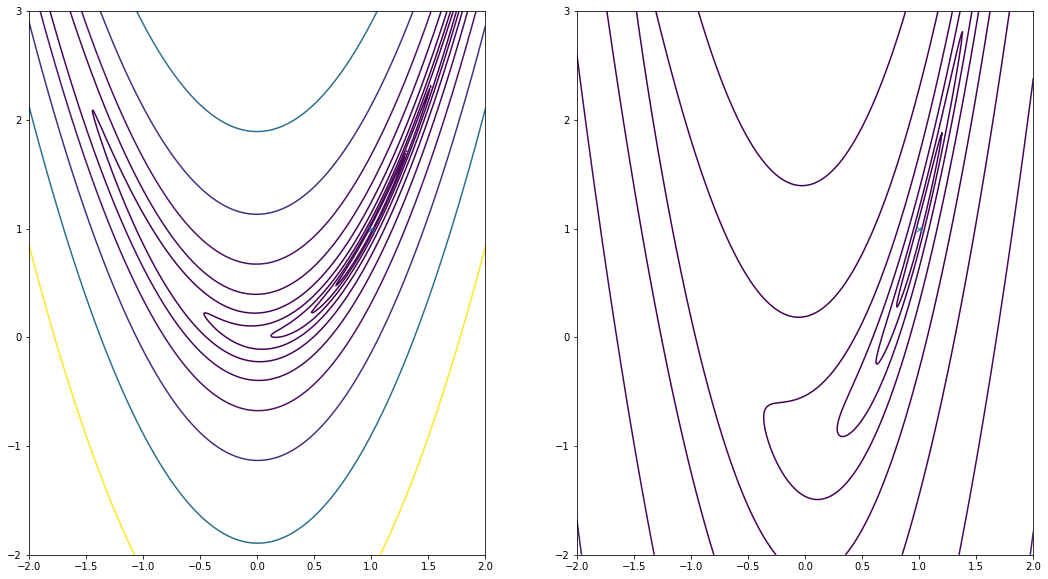

In [6]:
_, axes = plt.subplots(1,2,figsize=(18, 10))

# plot Rosenbrock contours
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 3, 400))
Z_rosen = rosen2d_XY(X, Y)
axes[0].plot([1], [1], 'x')
axes[0].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))

# plot Nesterov's function contours
Z_nest2 = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_nest2[i,j] = rosen_like_n([X[i,j], Y[i,j]])
axes[1].plot([1], [1], 'x')
axes[1].contour(X, Y, Z_nest2, np.logspace(-2, 3, 10))
plt.show()

[[  0.00000000e+00   0.00000000e+00]
 [  2.00000000e-04   0.00000000e+00]
 [  3.99960000e-04   8.00000000e-10]
 ..., 
 [  9.94394430e-01   9.88797776e-01]
 [  9.94394656e-01   9.88798226e-01]
 [  9.94394882e-01   9.88798676e-01]]
[[-1.         -1.        ]
 [-0.9196     -0.96      ]
 [-0.85279653 -0.92388672]
 ..., 
 [ 0.99424411  0.98849824]
 [ 0.99424434  0.9884987 ]
 [ 0.99424457  0.98849916]]


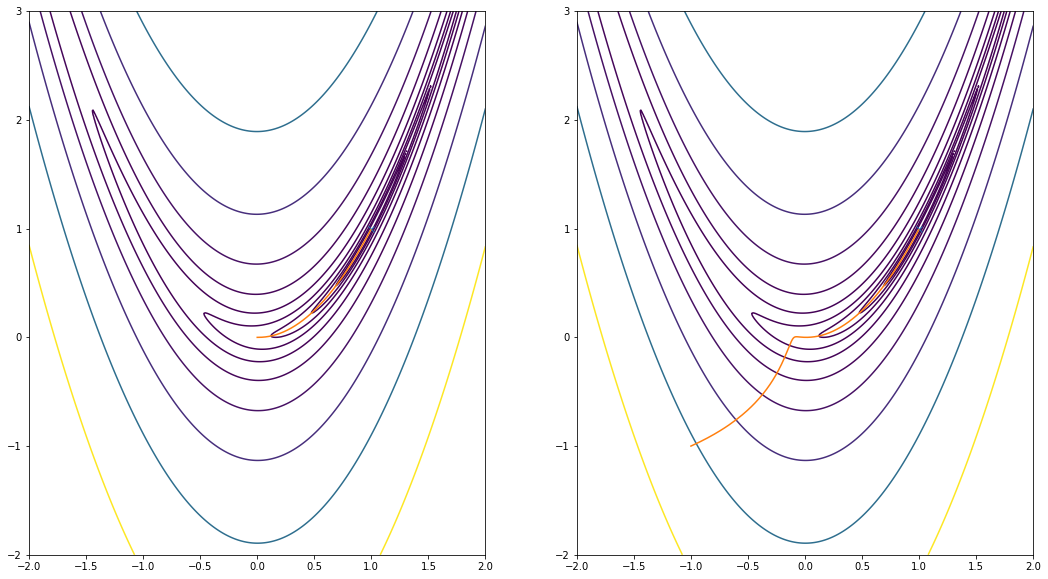

In [7]:
# Rosenbrock Workbench for a method
_, axes = plt.subplots(1,2,figsize=(18, 10))
axes[0].plot([1], [1], 'x')
axes[0].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))
axes[1].plot([1], [1], 'x')
axes[1].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))

# initial points (2D)
x_a = np.array([0, 0])
x_b = np.array([-1, -1])
x_c = np.array([-0.9, -0.8])
x_d = np.array([-0.9, 1.1])

# Some function,
# accepts, initial point (a numpy vector), function, its derivative, and (optionally) parameters
# return sequence of points
def const_step_solver(x0, f, f_grad, params = None):
    x = x0.copy()
    x_array = [x]
    gamma = 0.0001
    # stopping rule
    k = 0
    while f(x) > 1e-7 and k < 1e5:
        x = x - gamma * f_grad(x)
        x_array += [x]
        k += 1
    return x_array

# run solver for two different initial conditions
x_data_as_embedded_lists = const_step_solver(x_a, rosen2d, rosen2d_grad)
x_data = np.array(x_data_as_embedded_lists)
axes[0].plot(x_data[:, 0], x_data[:, 1],) 
print(x_data)

x_data_as_embedded_lists = const_step_solver(x_b, rosen2d, rosen2d_grad)
x_data = np.array(x_data_as_embedded_lists)
axes[1].plot(x_data[:, 0], x_data[:, 1],) 
print(x_data)
    
plt.show()

In [9]:
def const_step_solver(x0, f, f_grad, params = None):
    x = x0.copy()
    x_array = [x]
    gamma = 0.0001
    # stopping rule
    k = 0
    while f(x) > 1e-7:
        x = x + gamma * (-f_grad(x))
        x_array += [x]
        f_array += [f(x)]
        #print (f(x))
        k +=1
        print ('{} iterations is taken, f(x^k) = {}' .format (k, f_array[-1]))
        return x_array
    
# run solver for two different initial conditions
x_data_as_embedded_lists = const_step_solver(x_a, rosen2d, rosen2d_grad)
x_data = np.array(x_data_as_embedded_lists)
axes[0].plot(x_data[:, 0], x_data[:, 1],) 
print(x_data)

x_data_as_embedded_lists = const_step_solver(x_b, rosen2d, rosen2d_grad)
x_data = np.array(x_data_as_embedded_lists)
axes[1].plot(x_data[:, 0], x_data[:, 1],) 
print(x_data)
    
plt.show()

UnboundLocalError: local variable 'f_array' referenced before assignment